**Importing Necessary Libraries**

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Matplotlib visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from pylab import rcParams

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

**Reading the data set**

In [3]:
df =pd.read_csv('Cervical_Cancer_Risk_Cleaned.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,STDs:molluscum contagiosum_1.0,STDs:molluscum contagiosum_nan,STDs:AIDS_0.0,STDs:AIDS_nan,STDs:HIV_0.0,STDs:HIV_1.0,STDs:HIV_nan,STDs:HPV_0.0,STDs:HPV_1.0,STDs:HPV_nan
0,0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
1,1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
2,2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
3,3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
4,4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 65 columns):
Unnamed: 0                                858 non-null int64
Age                                       858 non-null int64
Number of sexual partners                 858 non-null float64
First sexual intercourse                  858 non-null float64
Num of pregnancies                        858 non-null float64
Smokes (years)                            858 non-null float64
Smokes (packs/year)                       858 non-null float64
Hormonal Contraceptives (years)           858 non-null float64
IUD (years)                               858 non-null float64
STDs (number)                             858 non-null float64
STDs: Number of diagnosis                 858 non-null int64
Dx:Cancer                                 858 non-null int64
Dx:CIN                                    858 non-null int64
Dx:HPV                                    858 non-null int64
Dx                       

**Basic statistics of the data**

In [6]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,858.0,428.500000,247.827561,0.0,214.25,428.5,642.75,857.0
Age,858.0,26.820513,8.497948,13.0,20.00,25.0,32.00,84.0
Number of sexual partners,858.0,2.541958,1.644264,1.0,2.00,2.0,3.00,28.0
First sexual intercourse,858.0,16.995338,2.791883,10.0,15.00,17.0,18.00,32.0
Num of pregnancies,858.0,2.322844,1.410732,0.0,1.00,2.0,3.00,11.0
Smokes (years),858.0,1.231544,4.059005,0.0,0.00,0.0,0.00,37.0
Smokes (packs/year),858.0,0.461430,2.210668,0.0,0.00,0.0,0.00,37.0
Hormonal Contraceptives (years),858.0,2.350017,3.527725,0.0,0.00,1.0,3.00,30.0
IUD (years),858.0,0.580967,1.813256,0.0,0.00,0.0,0.00,19.0
STDs (number),858.0,0.277389,0.591639,0.0,0.00,0.0,0.00,4.0


**There is no missing value.**

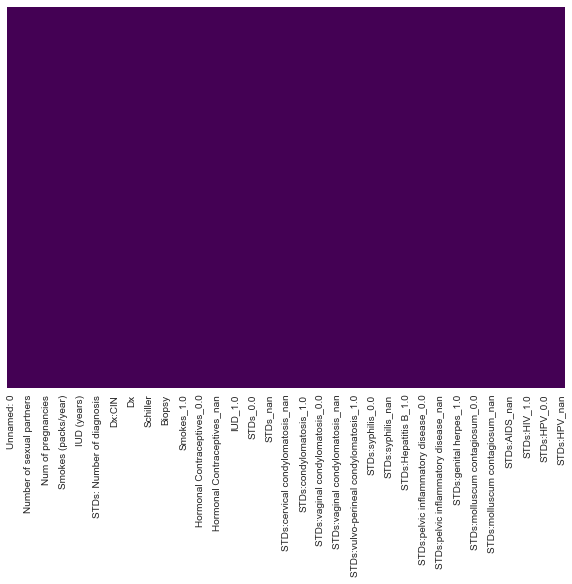

In [7]:
plt.figure(figsize = (10,7))
sns.set()
_ = sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

**Are the age of the patients normally distributed? To answer this questions we will use ECDF plot**

In [8]:
# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 1)
# Author: Justin Bois
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    # Number of data points: n
    n= len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)
    
    return x, y

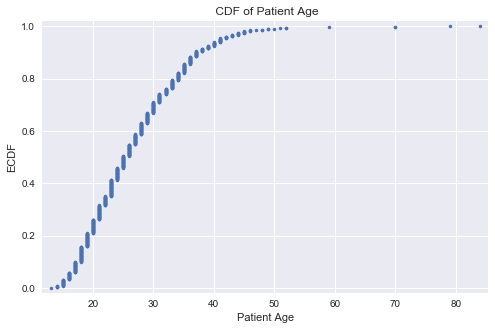

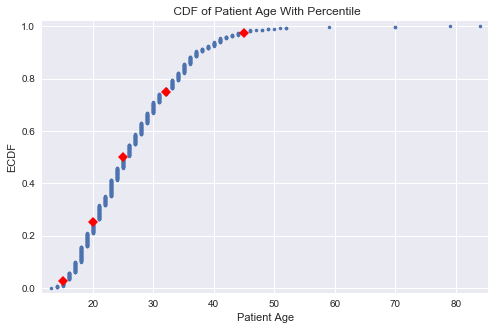

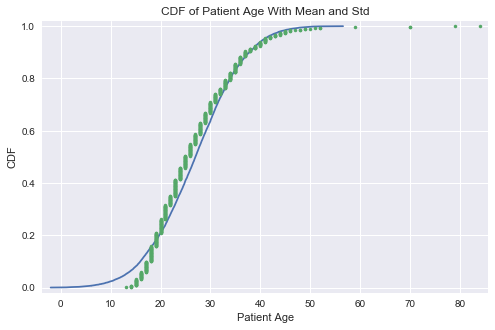

In [9]:
sns.set()
temp_np_array = np.array(df.Age)

# Compute ECDF for versicolor data: x_vers, y_vers
x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))
# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Patient Age')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of Patient Age')
# Display the plot
plt.show()

# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_temp = np.percentile(temp_np_array, percentiles)

# Print the result
#print (ptiles_temp)

x_temp, y_temp = ecdf(temp_np_array)
plt.figure(figsize = (8,5))

# Generate plot
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Patient Age')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of Patient Age With Percentile')
# Display the plot

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_temp, percentiles/100, marker='D', color='red', linestyle='none')

plt.show()

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp_np_array)
sigma = np.std(temp_np_array)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(temp_np_array)
# Plot the CDFs and show the plot
plt.figure(figsize = (8,5))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Patient Age')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Patient Age With Mean and Std')
plt.show()

**According to the CDF plots, We can say that the age of patients are normally distributed.**

In [10]:
# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 2)
# Author: Justin Bois

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))   
## Create a function to draw the boot-strap samples
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
            bs_replicates[i] = bootstrap_replicate_1d(data, func)            
    return bs_replicates

c:\users\mike\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,"Distribution of Patients' Age Mean")

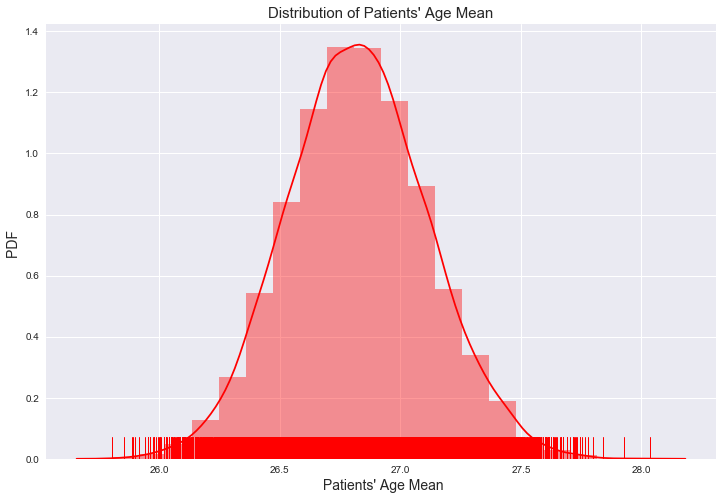

In [11]:
temp_np_array = np.array(df['Age'])
bs_replicates  = draw_bs_reps(temp_np_array, np.mean, 10000)
plt.figure(figsize=(12,8))
sns.distplot(bs_replicates, rug='True', bins=20, color = 'red')
plt.xlabel(" Patients' Age Mean", fontsize=14)
plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of Patients' Age Mean", fontsize=15)

### Hypothesis 1

**Null Hypothesis is: The true mean of the ages is 27.26. Alternative hypothesis is that the true mean of ages differs 27.26.**

In [12]:
# Compute the confidence interval
conf_int = np.percentile(bs_replicates,[2.5, 97.5])
# Print the confidence interval
print('95% confidence interval =', conf_int)

('95% confidence interval =', array([ 26.26570513,  27.40445804]))


In [13]:
# Compute fraction of replicates that are greater (p-value)
age_mean  = df.Age.mean()
print ('The mean of ages in the data set is {}'.format(age_mean))
p = np.sum(bs_replicates >= age_mean) / len(bs_replicates)
print ('p-value', p)

The mean of ages in the data set is 26.8205128205
('p-value', 0)


**Since p-value is 0 or less than 0.05, we reject the claim that the mean of patient's age is 27.26 in favor of the alternative hypothesis that the mean of patient's age differs from 27.26. Based on the 95% confidence interval, ages between 26.6 and 27.9 are considered normal.**

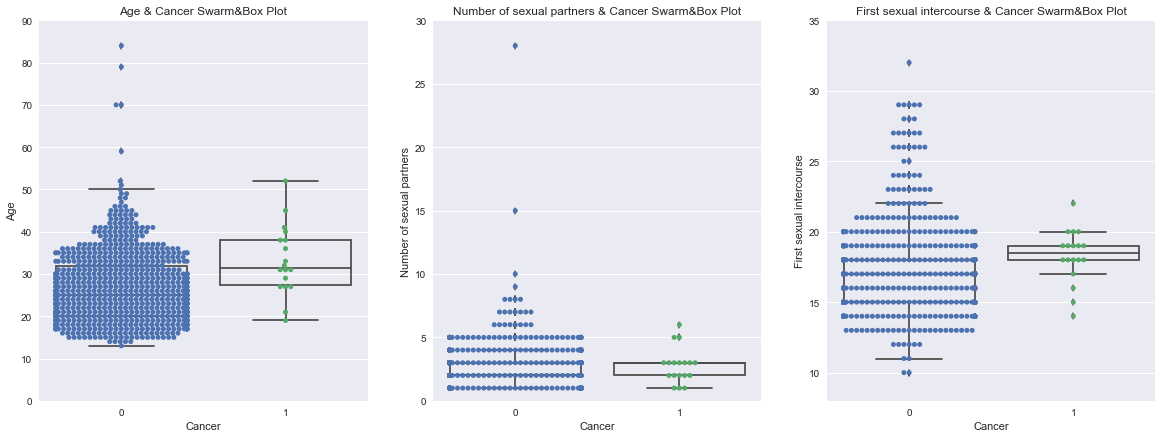

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
fig.set_size_inches(20, 7)
_ = sns.swarmplot(x= 'Dx:Cancer', y = 'Age', data = df, ax=ax1)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'Age', data=df, boxprops={'facecolor':'None'}, ax=ax1)
_ = ax1.set_xlabel('Cancer')
_ = ax1.set_ylabel('Age')
_ = ax1.set_title ('Age & Cancer Swarm&Box Plot')
_ = ax1.set_ylim(0,90)

_ = sns.swarmplot(x= 'Dx:Cancer', y = 'Number of sexual partners', data = df, ax=ax2)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'Number of sexual partners', data=df, boxprops={'facecolor':'None'}, ax=ax2)
_ = ax2.set_xlabel('Cancer')
_ = ax2.set_ylabel('Number of sexual partners')
_ = ax2.set_title ('Number of sexual partners & Cancer Swarm&Box Plot')
_ = ax2.set_ylim(0,30)

_ = sns.swarmplot(x= 'Dx:Cancer', y = 'First sexual intercourse', data = df, ax=ax3)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'First sexual intercourse', data=df, boxprops={'facecolor':'None'}, ax=ax3)
_ = ax3.set_xlabel('Cancer')
_ = ax3.set_ylabel('First sexual intercourse')
_ = ax3.set_title ('First sexual intercourse & Cancer Swarm&Box Plot')
_ = ax3.set_ylim(8,35)


plt.show()

### Hypothesis 2

**Null Hypothesis is: There is no significant difference between Cancer and Non_Cancer in average(mean)age. We are going to implement 2_sample test.**

In [15]:
Age_C = df[df['Dx:Cancer'] == 1]['Age']
Age_NC = df[df['Dx:Cancer'] == 0]['Age']

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute difference of mean temperature: empirical_diff_means
empirical_diff_means = diff_of_means(Age_C, Age_NC)

# Concatenate data sets: concat_temp
concat_Age = np.concatenate((Age_C, Age_NC))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(concat_Age, size=len(concat_Age))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(Age_C)], bs_sample[len(Age_C):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / float(len(bs_replicates))
print ('p-value: {}'.format(p))

p-value: 0.0024


**Since p-value is less than 0.05, we should reject null hypothesis which means that there is significant difference between Cancer and Non-Cancer in average of year.** 

### Hypothesis 3

**Null Hypothesis is: There is no significant difference between Cancer and Non_Cancer in average(mean) of number of sexual partners. We are going to implement 2_sample test.**

In [16]:
Part_C = df[df['Dx:Cancer'] == 1]['Number of sexual partners']
Part_NC = df[df['Dx:Cancer'] == 0]['Number of sexual partners']

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute difference of mean temperature: empirical_diff_means
empirical_diff_means = diff_of_means(Part_C, Part_NC)

# Concatenate data sets: concat_temp
concat_Part = np.concatenate((Part_C, Part_NC))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(concat_Part, size=len(concat_Part))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(Part_C)], bs_sample[len(Part_C):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / float(len(bs_replicates))
print ('p-value: {}'.format(p))

p-value: 0.2121


**Since p-value is slightly bigger than 0.05 we can not reject null hypothesis there is not enough evidence that there is a significant difference between Cancer and Non-Cancer in average number of sexual partners.**

### Hypothesis 4

**Null Hypothesis is: There is no significant difference between Cancer and Non_Cancer in average(mean) First sexual intercourse. We are going to implement 2_sample test.**

In [19]:
fsi_C = df[df['Dx:Cancer'] == 1]['First sexual intercourse']
fsi_NC = df[df['Dx:Cancer'] == 0]['First sexual intercourse']

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute difference of mean temperature: empirical_diff_means
empirical_diff_means = diff_of_means(fsi_C, fsi_NC)

# Concatenate data sets: concat_temp
concat_fsi = np.concatenate((fsi_C, fsi_NC))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(concat_fsi, size=len(concat_fsi))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(fsi_C)], bs_sample[len(fsi_C):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / float(len(bs_replicates))
print ('p-value: {}'.format(p))

p-value: 0.0333


**Since p-value is less than 0.05 we can reject null hypothesis which means there is a significant difference between Cancer and Non-Cancer in average number of sexual partners.**

### Hypothesis 5

**Null Hypothesis is: There is no significant difference between Cancer and Non_Cancer in average(mean) HPV. We are going to implement 2_sample test.**

In [18]:
hpv_C = df[df['Dx:Cancer'] == 1]['Dx:HPV']
hpv_NC = df[df['Dx:Cancer'] == 0]['Dx:HPV']

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute difference of mean temperature: empirical_diff_means
empirical_diff_means = diff_of_means(hpv_C, hpv_NC)

# Concatenate data sets: concat_temp
concat_hpv = np.concatenate((hpv_C, hpv_NC))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(concat_hpv, size=len(concat_hpv))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(hpv_C)], bs_sample[len(hpv_C):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / float(len(bs_replicates))
print ('p-value: {}'.format(p))

p-value: 0.0


**Since p-values is 0 we should reject the null hypothesis and accept that there is significant difference between Cancer and Non-cancer of HPv diagnosed mean.**